Робот с дифференциальным приводом начинает движение из положения $x=1.0м,y=2.0м,\theta=\pi/2$ и должен переместиться в положение $x=1.5м,y=2.0м,\theta=\pi/2$. Движение происходит посредством управляющих команд ($v_l$ - скорость левого колеса, $v_r$ - скорость правого колеса, $t$ - время движения).
1) Какое минимальное количество управляющих команд необходимо для приведения робота в желаемое положение?\
Возможно за две команды - движение по дуге с радиусом 0.25м до точки (1.5; 2.0) с ориентацией $-\pi/2$ и разворот на 180 градусов до целевой ориентации, либо две полуокружности.
2) Какова длина кратчайшей траектории в этих условиях?\
Кратчайшей траекторией будет повернуться в на $\pi/2$, проехать 0.5м и повернуться во второй раз. 0.5м
3) Поворот на месте $v_r = v, v_l = -v$;
 Движение вперед на 0.5м $v_r = v_l = v$;
 Поворот на месте в обратную сторону $v_r = -v, v_l = v$.
4) 0.5м

In [11]:
import math

def diffdrive(x: float, y: float, theta: float, vr: float, vl: float, t: float, l: float) -> tuple[float, float, float]:
    if vl == vr:
        x_new = x + vl * t * math.cos(theta)
        y_new = y + vl * t * math.sin(theta)
        theta_new = theta
    else:
        R = l / 2 * (vr + vl) / (vr - vl)
        ang_vel = (vr - vl) / l
        ICC_x = x - R * math.sin(theta)
        ICC_y = y + R * math.cos(theta)
        theta_new = theta + ang_vel * t
        x_new = math.cos(ang_vel * t) * (x - ICC_x) - math.sin(ang_vel * t) * (y - ICC_y) + ICC_x
        y_new = math.sin(ang_vel * t) * (x - ICC_x) + math.cos(ang_vel * t) * (y - ICC_y) + ICC_y
    return x_new, y_new, theta_new % (2 * math.pi)

After command c1: x=1.50 m, y=2.90 m, θ=1.57 rad
After command c2: x=1.50 m, y=2.90 m, θ=1.97 rad
After command c3: x=1.36 m, y=3.04 m, θ=2.77 rad


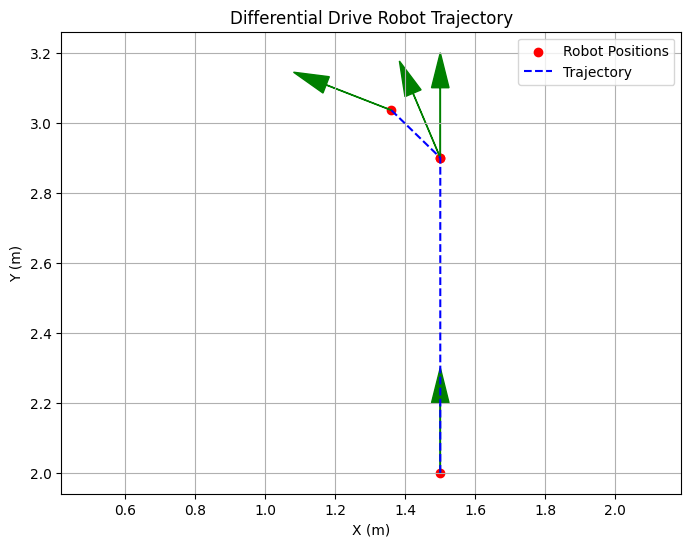

In [12]:
from matplotlib import pyplot as plt
import numpy as np

def test_commands():
    x, y, theta = 1.5, 2.0, np.pi / 2
    l = 0.5  


    commands = [
        (0.3, 0.3, 3),  
        (0.1, -0.1, 1),  
        (0.2, 0.0, 2)
    ]
    

    poses = [(x, y, theta)]
    for i, (vl, vr, t) in enumerate(commands):
        x, y, theta = diffdrive(x, y, theta, vl, vr, t, l)
        poses.append((x, y, theta))
        print(f"After command c{i+1}: x={x:.2f} m, y={y:.2f} m, θ={theta:.2f} rad")
    
    return poses


def plot_trajectory(poses):
    plt.figure(figsize=(8, 6))
    
    x_coords, y_coords, thetas = zip(*poses)
    
    plt.scatter(x_coords, y_coords, c='red', label='Robot Positions')
    plt.plot(x_coords, y_coords, 'b--', label='Trajectory')
    
    for x, y, theta in poses:
        dx = 0.2 * np.cos(theta)
        dy = 0.2 * np.sin(theta)
        plt.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, fc='green', ec='green')
    
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Differential Drive Robot Trajectory')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

poses = test_commands()
plot_trajectory(poses)